## **Setting up for GLM Regression Results**

In [2]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'Question2.csv'
# Use ',' as delimiter instead of whitespace
data = pd.read_csv(file_path, delimiter=',', header=None)

columns = [
    'Response', 'Total cost', 'Age', 'Gender', 'Number of interventions', 'Number of drugs',
     'Number of ER visits', 'Number of complications', 'Number of comorbidities', 'Duration'
]
data.columns = columns
X = data[['Total cost', 'Age', 'Gender', 'Number of interventions', 'Number of drugs',
          'Number of complications', 'Number of comorbidities', 'Duration']]
y = data['Number of ER visits']

# Add a constant term for the intercept
X = sm.add_constant(X)
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print(poisson_model.summary())



                  Generalized Linear Model Regression Results                  
Dep. Variable:     Number of ER visits   No. Observations:                  788
Model:                             GLM   Df Residuals:                      779
Model Family:                  Poisson   Df Model:                            8
Link Function:                     Log   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:                -1626.5
Date:                 Sat, 03 Aug 2024   Deviance:                       1043.6
Time:                         19:31:51   Pearson chi2:                 1.04e+03
No. Iterations:                      5   Pseudo R-squ. (CS):             0.4288
Covariance Type:             nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

## **Deviance Residuals vs Estimated Model Probablities**

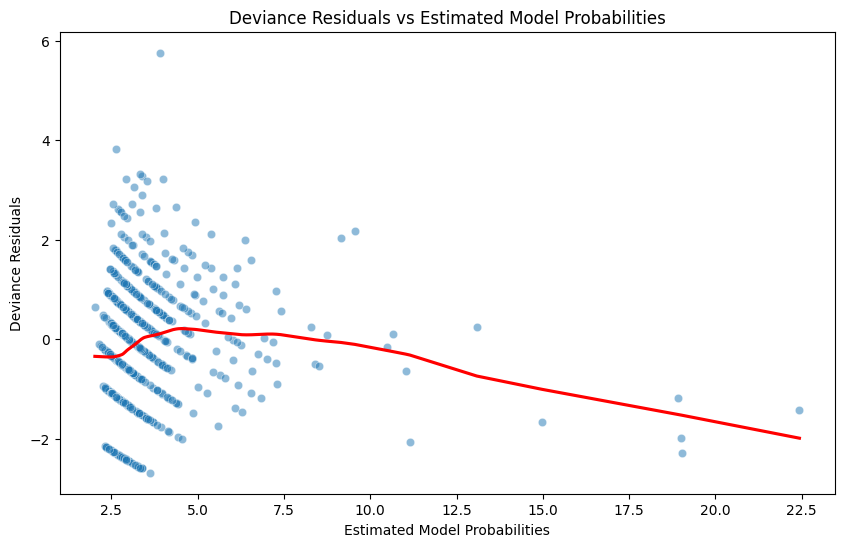

In [ ]:
deviance_residuals = poisson_model.resid_deviance
predicted_probabilities = poisson_model.predict(X)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predicted_probabilities, y=deviance_residuals, alpha=0.5)
sns.regplot(x=predicted_probabilities, y=deviance_residuals, lowess=True, scatter=False, color='red')
plt.xlabel('Estimated Model Probabilities')
plt.ylabel('Deviance Residuals')
plt.title('Deviance Residuals vs Estimated Model Probabilities')
plt.show()



# **Wald Test**

In [ ]:
wald_test_results = poisson_model.wald_test_terms()
wald_test_results.summary_frame()


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


,chi2,P>chi2,df constraint
const,[[8.047589931220656]],0.004556423034915436,1
Total cost,[[27.429318499243916]],1.629421112641558e-07,1
Age,[[5.1343294352454745]],0.02345714682740541,1
Gender,[[17.09687093615598]],3.5520779650297175e-05,1
Number of interventions,[[6.998921821544725]],0.008155882422380337,1
Number of drugs,[[232.0613061253898]],2.1174570968317645e-52,1
Number of complications,[[1.0440171815890076]],0.30688901879408675,1
Number of comorbidities,[[0.05962992145239517]],0.8070818235833706,1
Duration,[[3.454458778573762]],0.06308138366765324,1


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['df constraint']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'df constraint'}, axis=1)
              .sort_values('df constraint', ascending=True))
  xs = counted['df constraint']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('df constraint', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('df constraint')
_ = plt.ylabel('count()')

# **Likelihood Ratio**

In [7]:
X_full = data[['Total cost', 'Age', 'Gender', 'Number of interventions', 'Number of drugs',
               'Number of complications', 'Number of comorbidities', 'Duration']]
y = data['Number of ER visits']

# Add a constant term for the intercept
X_full = sm.add_constant(X_full)

X_reduced = data[['Total cost', 'Age', 'Gender', 'Number of interventions', 'Number of drugs']]
X_reduced = sm.add_constant(X_reduced)
poisson_model_full = sm.GLM(y, X_full, family=sm.families.Poisson()).fit()
poisson_model_reduced = sm.GLM(y, X_reduced, family=sm.families.Poisson()).fit()
from scipy.stats import chi2

lr_stat = 2 * (poisson_model_full.llf - poisson_model_reduced.llf)
df_diff = poisson_model_full.df_model - poisson_model_reduced.df_model
# Use chi2.sf from scipy.stats for chi-squared probability calculation
p_value = 1 - chi2.cdf(lr_stat, df_diff)

print(f"Likelihood Ratio Statistic: {lr_stat}")
print(f"Degrees of Freedom Difference: {df_diff}")
print(f"P-value: {p_value}")


Likelihood Ratio Statistic: 5.261531068848399
Degrees of Freedom Difference: 3
P-value: 0.1536181492084976


## **Backward Elimination**

In [ ]:
def backward_elimination(X, y, alpha=0.10):
    while True:
        model = sm.GLM(y, X, family=sm.families.Poisson()).fit()
        p_values = model.pvalues
        max_p_value = p_values.max()
        if max_p_value > alpha:
            excluded_feature = p_values.idxmax()
            X = X.drop(columns=[excluded_feature])
            print(f"Dropped {excluded_feature} with p-value {max_p_value}")
        else:
            break
    return X, model

X_final, final_model = backward_elimination(X, y)


Dropped Number of comorbidities with p-value 0.8070818235833706
Dropped Number of complications with p-value 0.30925889910006454


# **Final Model**

In [ ]:
final_model_summary = final_model.summary()
print(final_model_summary)


                  Generalized Linear Model Regression Results                  
Dep. Variable:     Number of ER visits   No. Observations:                  788
Model:                             GLM   Df Residuals:                      781
Model Family:                  Poisson   Df Model:                            6
Link Function:                     Log   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:                -1627.1
Date:                 Mon, 29 Jul 2024   Deviance:                       1044.7
Time:                         14:52:03   Pearson chi2:                 1.04e+03
No. Iterations:                      5   Pseudo R-squ. (CS):             0.4281
Covariance Type:             nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           